<h1>Exploring Binomial Distribution</h1>

This notebook is based on the tutorial "Binomial distributions | Probabilities of probabilities, part 1" by 3blue1brown https://www.youtube.com/watch?v=8idr1WZ1A7Q

I created this notebook to practice and play with the basic concept of binomial distribution by implementing the theoritical concept explained in the video. In this video, the author takes an example of positive and negative reviews from the customer and explains the underlying principles to finding the true success rate i.e maximizing the probability of a good experience. 

To simulate the data, we will use random number between 0 to 1. Any number less than 0.95 is a positive review and viceversa.

In [1]:
### To include packages folder path
import sys, os
sys.path.insert(0, os.path.abspath('') + "/../")

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from packages import binomial_distribution
import numpy as np
import math
import functools

In [3]:
success_rate = .95 #Assumption 


number_of_observations = 10000
reviews_per_observation = 50
positive_reviews = 48
ob_interval = 1000
headers = ["No. of Observations", "Total Reviews Per Observation", "Positive Reviews", "Percentage"]
metrics_rows = []
observations = []

In [4]:
# Run multiple experiments(observations)
for observation in range(100, number_of_observations, ob_interval):
    events = binomial_distribution.generate_events(observation, reviews_per_observation, success_rate) 
    metrics = binomial_distribution.get_metrics(events, reviews_per_observation, positive_reviews)
    metrics_rows.append(metrics)
    observations.append(events)

In [5]:
table_title = 'Probability of getting %d positive reviews out of %d'%(positive_reviews, reviews_per_observation)
print("{:^100}".format(table_title))
print("{:^100}".format("-" * 114))
binomial_distribution.display_table((headers, metrics_rows))

                        Probability of getting 48 positive reviews out of 50                        
------------------------------------------------------------------------------------------------------------------
No. of Observations          Total Reviews Per Observation          Positive Reviews          Percentage          
100                          50                                     48                        30.00%              
1100                         50                                     48                        26.91%              
2100                         50                                     48                        26.33%              
3100                         50                                     48                        27.26%              
4100                         50                                     48                        26.20%              
5100                         50                                     48                        

                        Probability of getting 48 positive reviews out of 50                        
------------------------------------------------------------------------------------------------------------------


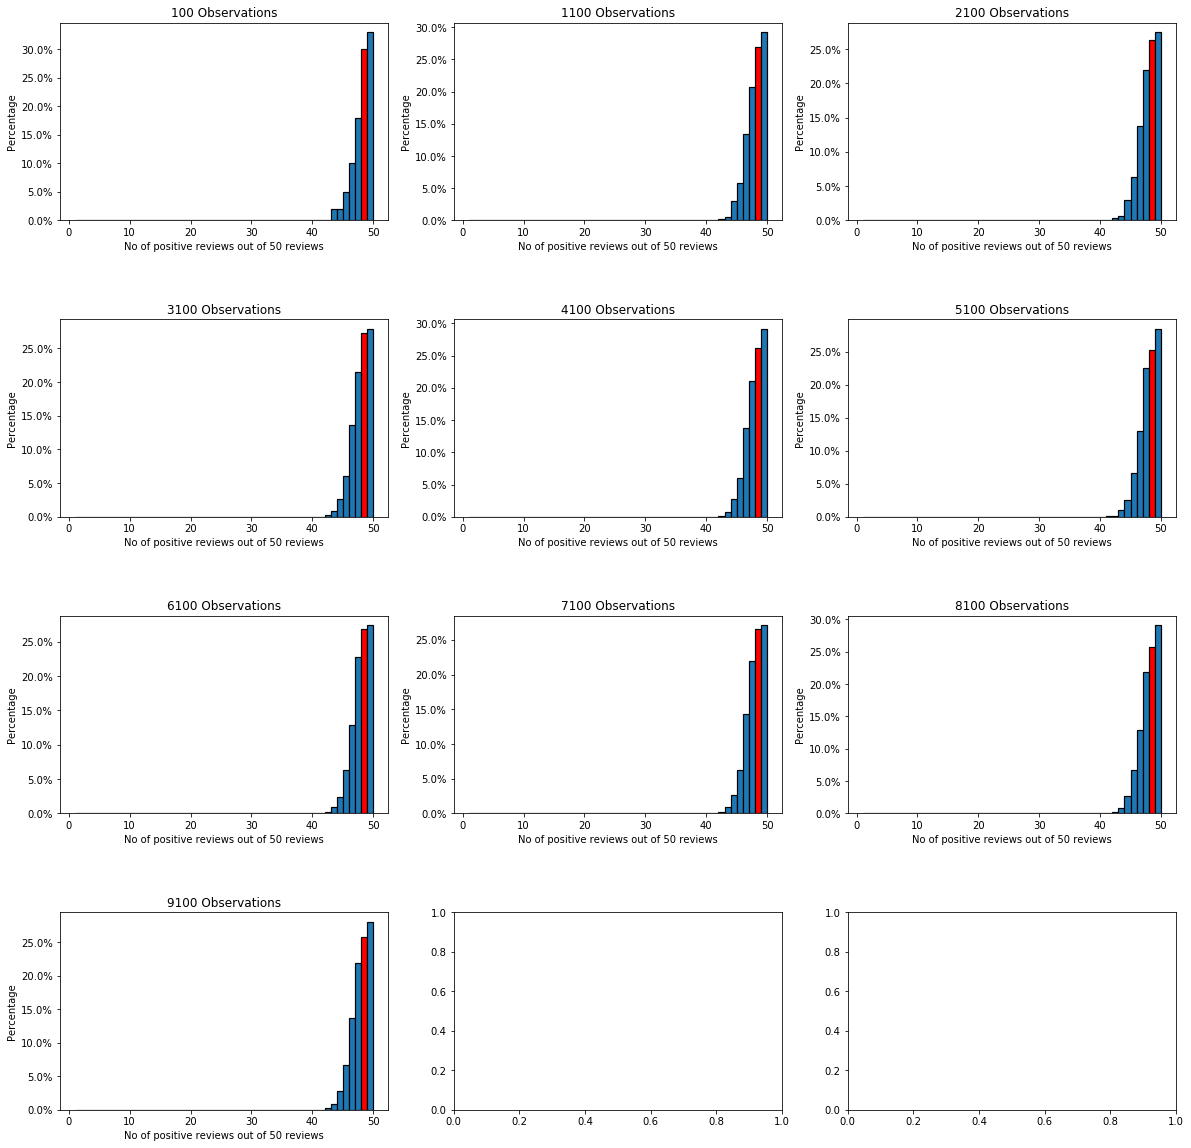

In [6]:
print("{:^100}".format(table_title))
print("{:^100}".format("-" * 114))
binomial_distribution.plot_hist(observations, reviews_per_observation, positive_reviews)    

From the repeated experiments, we see that the probability of getting 48 reviews out of 50 is around 26%. For clarity, the bar that represents 48 reviews is colored as 'red'. Now lets calculate the probability using the formula and see if this result matches to what we get from the formula.

In [7]:
# Calculate probability using formula and compare it with above result.
from math import factorial

p = success_rate
q = 1 - p
x = positive_reviews
n = reviews_per_observation

prob = (factorial(n)/(factorial(n - x) * factorial(x))) * (p**x) * (q**(n-x))
print('Probability of getting {} positive reviews out of {}: {:.2%}'.format(positive_reviews, reviews_per_observation, prob))

Probability of getting 48 positive reviews out of 50: 26.11%


Using formulae we got 26.11% probability and it matches with what we had derived from above experiments.